In [6]:
import pandas as pd
imoveis ={
 'Area':[80,80,80,150,200,90,110,130,180,160],
 'Valor':[300,450,550,600,350,420,550,780,360,575],
 'Dist_praia':[15,15,8,25,12,15,22,8,5,14]
}
Label =['1º','2º','3º','4º','5º','6º','7º','8º','9º','10º']
imoveis_df=pd.DataFrame(imoveis, index= Label)
imoveis_df.head()

,Area,Valor,Dist_praia
1º,80,300,15
2º,80,450,15
3º,80,550,8
4º,150,600,25
5º,200,350,12


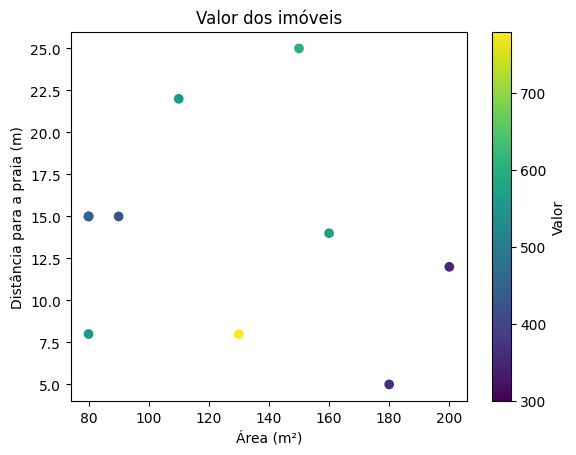

In [7]:
import matplotlib.pyplot as plt

# Criar o gráfico de dispersão
plt.scatter(imoveis_df['Area'], imoveis_df['Dist_praia'],
c=imoveis_df['Valor'])
plt.xlabel('Área (m²)')
plt.ylabel('Distância para a praia (m)')
plt.title('Valor dos imóveis')
plt.colorbar(label='Valor')
plt.show()

cluster
0    493.5
Name: Valor, dtype: float64
Número de clusters encontrados: 1


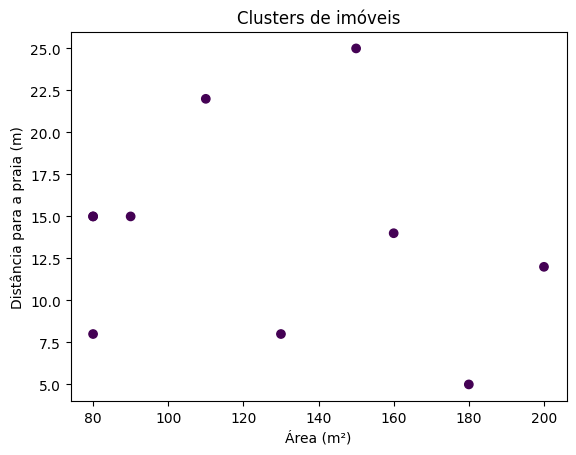

In [8]:
# Normalização dos dados

from sklearn.preprocessing import StandardScaler
# Escalar as variáveis
scaler = StandardScaler()
scaled_data = scaler.fit_transform(imoveis_df[['Area', 'Dist_praia']])
from sklearn.cluster import DBSCAN
# Executar o algoritmo DBSCAN
dbscan = DBSCAN(eps=30, min_samples=2)
dbscan.fit(scaled_data)
# Obter os rótulos dos clusters
labels = dbscan.labels_

# Adicionar os rótulos dos clusters ao DataFrame
imoveis_df['cluster'] = labels
# Calcular o valor médio dos imóveis em cada cluster
mean_values =imoveis_df.groupby('cluster')['Valor'].mean()
# Exibir os valores médios dos imóveis em cada cluster
print(mean_values)
# Número de clusters encontrados
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(f"Número de clusters encontrados: {n_clusters}")
# Gráfico de dispersão com os clusters
plt.scatter(imoveis_df['Area'], imoveis_df['Dist_praia'], c=imoveis_df['cluster'])
plt.xlabel('Área (m²)')
plt.ylabel('Distância para a praia (m)')
plt.title('Clusters de imóveis')
plt.show()

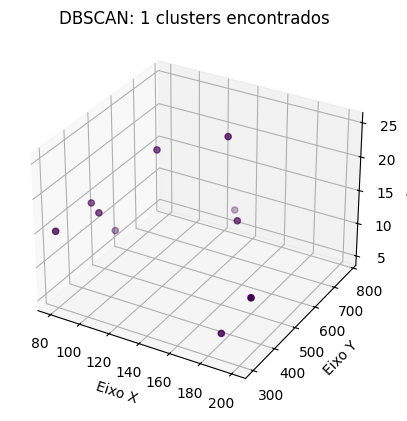

In [9]:
from mpl_toolkits.mplot3d import Axes3D
# Criando o gráfico em 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(imoveis_df['Area'], imoveis_df['Valor'], imoveis_df['Dist_praia'],
c=imoveis_df['cluster'])
ax.set_title('DBSCAN: %d clusters encontrados' % n_clusters)
ax.set_xlabel('Eixo X')
ax.set_ylabel('Eixo Y')
ax.set_zlabel('Eixo Z')
plt.show()